In [1]:
## Análise de distribuição estatística dos dados - Histograma, normalidade e transformação Box-Cox

## CÉLULA 1: Instruções de carregamento do arquivo e bibliotecas a ser importadas

""""
    Para executar uma CÉLULA, pressione o botão "Run" no topo, com a CÉLULA selecionada, ou pressione:
    
    Shift + Enter

-Se seus dados estiverem em um arquivo xlsx utilize a CÉLULA 2

-Se seus dados estiverem em um arquivo csv contendo cabeçalhos, utilize a CÉLULA 3

-Se seus dados estiverem em um arquivo csv sem cabeçalhos, utilize a CÉLULA 4

-Utilize apenas a CÉLULA correta
-Substitua o texto entre aspas na variável "caminho" pelo endereço do arquivo em sua máquina.

EXECUTE ESTA CÉLULA ANTES DE PROSSEGUIR

EXECUTE APENAS UMA CÉLULA POR VEZ

-Caso deseje apagar a saída de uma célula carregada, mas não deseje carregar uma nova saída, vá à aba superior, escolha o ícone
do teclado (open the command palette/ jupyter-notebook command group) e selecione clear cell output.

@author: Marco César Prado Soares, MSc.
Especialista Lean Six Sigma Master Black Belt, Eng. Químico, MSc. Eng. Mecatrônica (instrumentação) 
Marco.Soares@br.ey.com; marcosoares.feq@gmail.com
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## CÉLULA 3: dados em arquivo csv com cabeçalho

caminho1 = "weekly_app_v2 - beforeChange.csv"
dataset1 = pd.read_csv(caminho1)

dataset1
#SIGA PARA A CÉLULA 5

,date,count,time_tag,waiting_time,pq_satisfacao
0,2020-02-24,25.0,0.0,14.160000,4.840000
1,2020-03-02,41.0,0.0,11.024390,4.195122
2,2020-03-09,31.0,0.0,11.387097,4.870968
3,2020-03-16,3.0,0.0,10.666667,3.666667
4,2020-03-23,29.0,0.0,10.241379,5.172414
5,2020-03-30,44.0,0.0,11.795455,3.159091
6,2020-04-06,44.0,0.0,10.659091,4.500000
7,2020-04-13,51.0,0.0,14.176471,3.843137
8,2020-04-20,59.0,0.0,12.000000,3.677966
9,2020-04-27,99.0,0.0,19.878788,3.707071


In [3]:
caminho2 = "weekly_app_v2 - afterChange.csv"
dataset2 = pd.read_csv(caminho2)

dataset2

,date,count,time_tag,waiting_time,pq_satisfacao
0,2020-07-27,573.0,1.0,11.825480,0.0
1,2020-08-03,537.0,1.0,18.668529,0.0
2,2020-08-10,604.0,1.0,21.816225,0.0
3,2020-08-17,598.0,1.0,12.909699,0.0
4,2020-08-24,718.0,1.0,12.026462,0.0
5,2020-08-31,691.0,1.0,10.578871,0.0
6,2020-09-07,837.0,1.0,18.841099,0.0
7,2020-09-14,659.0,1.0,15.053111,0.0
8,2020-09-21,715.0,1.0,11.180420,0.0
9,2020-09-28,667.0,1.0,8.967016,0.0


# CÉLULA 6: Instruções Gerais

### ATENÇÃO: NÃO EXECUTE ESTA CÉLULA - Ela contém apenas texto explicativo

Este notebook destina-se à análise de distribuição estatística dos dados, e transformação deles em dados que sigam a distribuição normal. À seguir, são dadas as análises disponíveis. Siga à célula correspondente à análise desejada:

## 1) Histograma com ou sem curva normal ajustada

- Aqui será construído o histograma dos dados.
- Este sistema permite a verificação simultânea da curva normal ajustada.
- O resultado pode ser prejudicado para dados com diferenças extremamente pequenas. Neste caso, pode ser mais interessante utilizar o comando de histograma do R (exemplo: hist(y,main="Histograma do valor de inventario", xlab = "Valor", ylab = "Contagem", col="red"), o qual já é otimizado para esta situação particular.
- Também são retornados: 
    1) um resumo das estatísticas gerais dos dados: total de dados avaliados; média; desvio-padrão; valor mais elevado; valor 
        mais baixo; e bin size, a largura da barra do histograma.
    2) a tabela de frequencias usada na construção do histograma

Siga para as CÉLULAS 7 a 9.
----------------------------------------

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

## 2) Testes de normalidade

- Aqui será avaliado se os dados podem ser descritos por uma distribuição estatística do tipo normal, por meio de dois testes distintos: teste de Lilliefors e teste de Anderson-Darling.
- Note que existem outros testes (em especial testes Anderson-Darling) destinados à avaliação de outras distribuições. O pacote nortest do R fornece uma gama de testes deste tipo, em variedade maior que o disponibilizado no pacote statsmodels do Python.
- Este sistema retornará dois dataframes contendo p-valores, a probabilidade de uma hipótese-nula ser verdadeira. Neste caso, a hipótese-nula dos testes de hipótese (Lilliefors e Anderson-Darling) é que os dados seguem a normal.

Siga para as CÉLULAS 10 a 12.
----------------------------------------

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

## 3) Transformação Box-Cox

- Este sistema transforma o conjunto de dados original em dados descritos pela curva normal.
- Também os limites de especificação transformados.
- Possibilita, assim, que seja analisado se os dados estão dentro das especificações.

Siga para as CÉLULAS 13 a 15.
----------------------------------------

In [4]:
## CÉLULA 7: Função de construção do histograma dos dados

#Execute esta CÉLULA para carregar a função

def histogram(y, largura_da_barra, normal_curve_overlay = True, legenda_dos_dados = None, titulo_y = None, titulo_histograma = None):
    
    import pandas as pd
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
    
    #Calculo do bin size - largura do histograma:
    #1: Encontrar o menor (lowest) e o maior (highest) valor dentro da tabela de dados)
    #2: Calcular rangehist = highest - lowest
    #3: Calcular quantidade de dados (samplesize) de entrada fornecidos
    #4: Calcular a quantidade de celulas da tabela de frequencias (ncells)
    #ncells = numero inteiro mais proximo da (raiz quadrada de samplesize)
    #5: Calcular binsize = rangehist/(ncells)
    #ATENCAO: Nao se esquecer de converter range, ncells, samplesize e binsize para valores absolutos (modulos)
    #isso porque a largura do histograma tem que ser um numero positivo

    y = y.reset_index(drop=True)
    #faz com que os indices desta serie sejam consecutivos e a partir de zero

    #Estatisticas gerais: media (mu) e desvio-padrao (sigma)
    mu = y.mean() 
    sigma = y.std() 

    #Calculo do bin-size
    highest = y.max()
    lowest = y.min()
    rangehist = highest - lowest
    rangehist = abs(rangehist)
    #garante que sera um numero positivo
    samplesize = y.count() #contagem do total de entradas
    ncells = (samplesize)**0.5 #potenciacao: ** - raiz quadrada de samplesize
    #resultado da raiz quadrada e sempre positivo
    ncells = round(ncells) #numero "redondo" mais proximo
    ncells = int(ncells) #parte inteira do numero arredondado
    #ncells = numero de linhas da tabela de frequencias
    binsize = rangehist/ncells
    binsize = round(binsize)
    binsize = int(binsize) #precisa ser inteiro
    
    #Construcao da tabela de frequencias

    j = 0 #indice da tabela de frequencias
    #Este indice e diferente do ordenamento dos valores em ordem crescente
    xhist = []
    #Lista vazia que contera os x do histograma
    yhist = []
    #Listas vazia que conteras o y do histograma
    hist_labels = []
    #Esta lista gravara os limites da barra na forma de strings

    pontomediodabarra = lowest + binsize/2 
    limitedabarra = lowest + binsize
    #ponto medio da barra 
    #limite da primeira barra do histograma
    seriedohist1 = y
    seriedohist1 = seriedohist1.sort_values(ascending=True)
    #serie com os valores em ordem crescente
    seriedohist1 = seriedohist1.reset_index(drop=True)
    #garante que a nova serie tenha indices consecutivos, iniciando em zero
    i = 0 #linha inicial da serie do histograma em ordem crescente
    valcomparado = seriedohist1[i]
    #primeiro valor da serie, o mais baixo

    while (j <= (ncells-1)):
        
        #para quando termina o numero de linhas da tabela
        xhist.append(pontomediodabarra)
        #tempo da tabela de frequencias
        cont = 0
        #variavel de contagem do histograma
        #contagem deve ser reiniciada
       
        if (i < samplesize):
            #2 condicionais para impedir que um termo de indice inexistente
            #seja acessado
            while (valcomparado <= limitedabarra) and (valcomparado < highest):
                #o segundo criterio garante a parada em casos em que os dados sao
                #muito proximos
                    cont = cont + 1 #adiciona contagem a tabela de frequencias
                    i = i + 1
                    
                    if (i < samplesize): 
                        valcomparado = seriedohist1[i]
        
        yhist.append(cont) #valor de ocorrencias contadas
        
        limite_infdabarra = pontomediodabarra - binsize/2
        rotulo = "%.2f - %.2f" %(limite_infdabarra, limitedabarra)
        #intervalo da tabela de frequencias
        #%.2f: 2 casas decimais de aproximação
        hist_labels.append(rotulo)
        
        pontomediodabarra = pontomediodabarra + binsize
        #tanto os pontos medios quanto os limites se deslocam do mesmo intervalo
        
        limitedabarra = limitedabarra + binsize
        #proxima barra
        
        j = j + 1
    
    #Temos que verificar se o valor maximo foi incluido
    #isso porque o processo de aproximacao por numero inteiro pode ter
    #arredondado para baixo e excluido o limite superior
    #Porem, note que na ultima iteracao o limite superior da barra foi 
    #somado de binsize, mas como j ja e maior que ncells-1, o loop parou
    
    #assim, o limitedabarra nesse momento e o limite da barra que seria
    #construida em seguida, nao da ultima barra da tabela de frequencias
    #isso pode fazer com que esta barra ja seja maior que o highest
    
    #note porem que nao aumentamos o valor do limite inferior da barra
    #por isso, basta vermos se ele mais o binsize sao menores que o valor mais alto
    
    
    while ((limite_infdabarra+binsize) < highest):
        
        #vamos criar novas linhas ate que o ponto mais alto do histograma
        #tenha sido contado
        ncells = ncells + 1 #adiciona uma linha a tabela de frequencias
        xhist.append(pontomediodabarra)
        
        cont = 0 #variavel de contagem do histograma
        
        while (valcomparado <= limitedabarra):
                cont = cont + 1 #adiciona contagem a tabela de frequencias
                i = i + 1
                if (i < samplesize):
                    valcomparado = seriedohist1[i]
                    #apenas se i ainda nao e maior que o total de dados
                
                else: 
                    
                    break
        
        #parar o loop se i atingiu um tamanho maior que a quantidade 
        #de dados.Temos que ter este cuidado porque estamos acrescentando
        #mais linhas a tabela de frequencias para corrigir a aproximacao
        #de ncells por um numero inteiro
        
        yhist.append(cont) #valor de ocorrencias contadas
        
        limite_infdabarra = pontomediodabarra - binsize/2
        rotulo = "%.2f - %.2f" %(limite_infdabarra, limitedabarra)
        #intervalo da tabela de frequencias - 2 casas decimais
        hist_labels.append(rotulo)
        
        pontomediodabarra = pontomediodabarra + binsize
        #tanto os pontos medios quanto os limites se deslocam do mesmo intervalo
        
        limitedabarra = limitedabarra + binsize
        #proxima barra
        
    estatisticas_col1 = []
    #contera as descricoes das colunas da tabela de estatisticas gerais
    estatisticas_col2 = []
    #contera os valores da tabela de estatisticas gerais
    
    estatisticas_col1.append("Total de dados avaliados")
    estatisticas_col2.append(samplesize)
    estatisticas_col1.append("Média (mu)")
    estatisticas_col2.append(mu)
    estatisticas_col1.append("Desvio-padrão (sigma)")
    estatisticas_col2.append(sigma)
    estatisticas_col1.append("Valor mais elevado")
    estatisticas_col2.append(highest)
    estatisticas_col1.append("Valor mais baixo")
    estatisticas_col2.append(lowest)
    estatisticas_col1.append("Range dos dados\n(valor máximo - valor mínimo)")
    estatisticas_col2.append(rangehist)
    estatisticas_col1.append("Bin size\n(largura da barra do histograma)")
    estatisticas_col2.append(binsize)
    estatisticas_col1.append("Quantidade de linhas\nna tabela de frequências")
    estatisticas_col2.append(ncells)
    #como o comando append grava linha a linha em sequencia, garantimos
    #a correspondencia das colunas
    #Assim como em qualquer string, incluindo de rotulos de graficos
    #os \n sao lidos como quebra de linha
    
    d1 = {"Estatísticas gerais dos dados": estatisticas_col1, "Valor calculado": estatisticas_col2}
    #dicionario das duas series, para criar o dataframe com as descricoes
    estatisticas_gerais = pd.DataFrame(data = d1)
    
    #Casos os títulos estejam presentes (valor nao e None):
    #vamos utiliza-los
    #Caso contrario, vamos criar nomenclaturas genericas para o histograma
    
    eixo_y = "Counting/Frequency"
    
    if not (legenda_dos_dados is None):
        xlabel = legenda_dos_dados
    
    else:
        xlabel = "Frequency\n table data"
    
    if not (titulo_y is None):
        eixo_x = titulo_y
        #lembre-se que no histograma, os dados originais vao pro eixo X
        #O eixo Y vira o eixo da contagem/frequencia daqueles dados
    
    else:
        eixo_x = "X: Mean value of the interval"
    
    if not (titulo_histograma is None):
        string1 = "- $\mu = %.2f$, $\sigma = %.2f$" %(mu, sigma)
        main_label = titulo_histograma + string1
        #concatena a string do titulo a string com a media e desvio-padrao
        #%.2f: o numero entre %. e f indica a quantidade de casas decimais da 
        #variavel float f. No caso, arredondamos para 2 casas
        #NAO SE ESQUECA DO PONTO: ele que indicara que sera arredondado o 
        #numero de casas
    
    else:
        main_label = "Data Histogram - $\mu = %.2f$, $\sigma = %.2f$" %(mu, sigma)
        #os simbolos $\ $ substituem o simbolo pela letra grega
    
    d2 = {"Intervalos considerados": hist_labels, eixo_x: xhist, eixo_y: yhist}
    #dicionario que compoe a tabela de frequencias
    tab_frequencias = pd.DataFrame(data = d2)
    #cria a tabela de frequencias como um dataframe de saida
    
    """
    Normal curve equation
    
    y = p(X) = (1/((sigma)*sqrt(2*pi)))*exp((-1)*(X-mu)²/2(sigma²))
    0 <= p(X) <= 1
    mu = mean value of X
    sigma = standard deviation of X
    sqrt = square root function
    pi = 3.14159...
    e = 2.71828...
    exp = e** = e^ = exponential function
    
    numpy functions available:
        np.sqrt(X): square root of X
        np.pi = value of pi
        np.exp(X) = exponential function of X = e**X = e^X = exp(X)
    
    """
    #parametros da normal ja calculados:
    #mu e sigma
    #numero de bins: ncells
    #limites de especificacao: lsl,usl - target
    
    #valor maximo do histograma
    max_hist = max(yhist)
    #seleciona o valor maximo da serie, para ajustar a curva normal
    #isso porque a normal é criada com valores entre 0 e 1
    #multiplicando ela por max_hist, fazemos ela se adequar a altura do histograma
    
    if (normal_curve_overlay == True):
        
        #construir a normal ajustada/esperada
        #vamos criar pontos ao redor da media mu - 4sigma ate mu + 4sigma, 
        #de modo a garantir a quase totalidade da curva normal. 
        #O incremento será de 0.10 sigma a cada iteracao
        x_inf = mu -(4)*sigma
        x_sup = mu + 4*sigma
        x_inc = (0.10)*sigma
        
        x_normal_adj = []
        y_normal_adj = []
        
        x_adj = x_inf
        y_adj = ((1 / (np.sqrt(2 * np.pi) * sigma)) *np.exp(-0.5 * (1 / sigma * (x_adj - mu))**2))
        x_normal_adj.append(x_adj)
        y_normal_adj.append(y_adj)
        
        while(x_adj < x_sup): 
            
            x_adj = x_adj + x_inc
            y_adj = ((1 / (np.sqrt(2 * np.pi) * sigma)) *np.exp(-0.5 * (1 / sigma * (x_adj - mu))**2))
            x_normal_adj.append(x_adj)
            y_normal_adj.append(y_adj)
        
        #vamos ajustar a altura da curva ao histograma. Para isso, precisamos
        #calcular quantas vezes o ponto mais alto do histograma é maior que o ponto
        #mais alto da normal (chamaremos essa relação de fator). A seguir,
        #multiplicamos cada elemento da normal por este mesmo fator
        max_normal = max(y_normal_adj) 
        #maximo da normal ajustada, numero entre 0 e 1
        
        fator = (max_hist)/(max_normal)
        size_normal = len(y_normal_adj) #quantidade de dados criados
        
        i = 0
        while (i < size_normal):
            y_normal_adj[i] = (y_normal_adj[i])*(fator)
            i = i + 1
    
    #Fazer o grafico
    fig, ax = plt.subplots()
    
    ax.bar(xhist, yhist, width = largura_da_barra, label=xlabel, color='blue')
    #ajuste manualmente a largura, width, para deixar as barras mais ou menos proximas
    
    if (normal_curve_overlay == True):
    
        #adicionar a normal
        ax.plot(x_normal_adj, y_normal_adj, color = 'black', label = 'Adjusted/expected\n normal curve')
    
    ax.set_xlabel(eixo_x)
    ax.set_ylabel(eixo_y)
    ax.set_title(main_label)
    ax.set_xticks(xhist)
    
    ax.legend()
    ax.grid(True) #mude para False, caso não deseje ver as linhas de grade
    
    fig.tight_layout()
    plt.show()

    return estatisticas_gerais, tab_frequencias

# CÉLULA 8: Função para construção do histograma e da tabela de frequência dos dados

### ATENÇÃO: NÃO EXECUTE ESTA CÉLULA - Ela contém apenas texto explicativo    
    
INSTRUÇÕES:

1) Esta função retorna 2 dataframes:
    
    1) dataframe estatisticas_gerais, um resumo das estatísticas gerais dos dados: total de dados avaliados; média; desvio-padrão; valor mais elevado; valor mais baixo; e bin size, a largura da barra do histograma.
    
    2) dataframe tab_frequencias, que mostra a tabela de frequencias usada na construção do histograma

2) Os parâmetros x e y da função devem ser apenas listas, não dataframe(s)

3) Esta função retorna 2 dataframes. Deste modo, você precisa chamar 2 daframes, não apenas um.

Exemplo: caso deseje salvar o dataframe estatisticas_gerais em df1,  e o dataframe tab_frequencias em df2, e os dados estão na variável y:
    
       df1, df2 = histogram(y, largura_da_barra = 10, normal_curve_overlay = True, legenda_dos_dados = None, titulo_y = None, titulo_histograma = None)
    
Note que o primeiro será sempre estatisticas_gerais, e o segundo será tab_frequencias

Você pode dar outros nomes para os dataframes chamados:
   
       estatisticas_gerais, tab_frequencias = histogram(y, largura_da_barra = 10, normal_curve_overlay = True, legenda_dos_dados = None, titulo_y = None, titulo_histograma = None)

4) Caso QUEIRA mostrar a curva normal ajustada, mantenha:
    
        normal_curve_overlay = True

CASO NAO QUEIRA MOSTRAR A NORMAL:
    
        normal_curve_overlay = False

5) Altere o valor de largura_da_barra até conseguir ver o histograma de forma clara
    
6) Os demais parâmetros são textos (strings). Declare-os entre aspas ou mantenha o valor None
    
##### NOTA: ESTE ALGORITMO PODE FALHAR CASO TODOS OS DADOS SEJAM MUITO PRÓXIMOS. 

Isso porque a largura ncells teria de ser tão larga que uma única barra englobaria todos os dados. Além disso, principalmente quando se usa a transformação Box-Cox, a diferença entre os dados transformados pode ser baixa demais para que a memória 
disponível no sistema identifique eles como números efetivamente diferentes (no arredondamento, eles passam a ser considerados iguais, fazendo com que o loop de comparação que verifica se um dado está numa barra ou na seguinte não possa ser finalizado. Isto gera MemoryError).

CASO QUEIRA, mesmo assim, CONSTRUIR O HISTOGRAMA, apague as linhas de cálculo do bin size (de binsize = rangehist/ncells até binsize = int(binsize)) e substitua por um valor desejado de binsize. Por exemplo, substitua as linhas por:
    
    binsize = 10

Assim, você definirá manualmente o tamanho da barra, podendo "esticá-la" para englobar todos os dados.

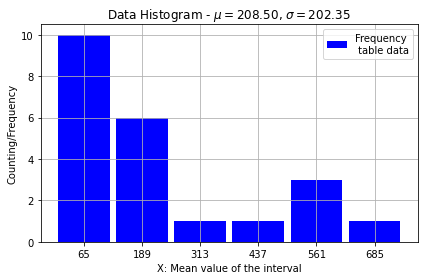

In [9]:
## CÉLULA 9: CONSTRUÇÃO DO HISTOGRAMA PARA SEUS DADOS

#DEFINA A VARIAVEL y para a qual será construído o histograma. 
#Basta substituir o valor entre aspas pelo nome da coluna onde está Y:

y = dataset1['count']

#NOTA: o valor y necessariamente deve ser uma série.

estatisticas_gerais_antes_count, tab_frequencias_antes_count = histogram(y = y, largura_da_barra = 110, normal_curve_overlay = False, legenda_dos_dados = None, titulo_y = None, titulo_histograma = None)

# Altere manualmente o valor numérico da largura_da_barra do histograma até alcançar um espaçamento mínimo entre barras
#consecutivas. O valor da largura da barra depende de cada conjunto particular de dados utilizado.

"""
Substitua os demais campos None de acordo com as instruções dadas na CÉLULA 8.
- Os títulos e legendas devem ser fornecidos como um texto entre aspas.
- Modifique normal_curve_overlay = True para normal_curve_overlay = False caso não deseje ver a normal sobreposta.

"""

estatisticas_gerais_antes_count.to_csv(r"estatisticas_gerais_antes_count.csv", index = False)

tab_frequencias_antes_count.to_csv(r"tab_frequencias_antes_count.csv", index = False)


In [10]:
estatisticas_gerais_antes_count

,Estatísticas gerais dos dados,Valor calculado
0,Total de dados avaliados,22.000000
1,Média (mu),208.500000
2,Desvio-padrão (sigma),202.345944
3,Valor mais elevado,624.000000
4,Valor mais baixo,3.000000
5,Range dos dados\n(valor máximo - valor mínimo),621.000000
6,Bin size\n(largura da barra do histograma),124.000000
7,Quantidade de linhas\nna tabela de frequências,6.000000


In [11]:
tab_frequencias_antes_count

,Intervalos considerados,X: Mean value of the interval,Counting/Frequency
0,3.00 - 127.00,65.0,10
1,127.00 - 251.00,189.0,6
2,251.00 - 375.00,313.0,1
3,375.00 - 499.00,437.0,1
4,499.00 - 623.00,561.0,3
5,623.00 - 747.00,685.0,1


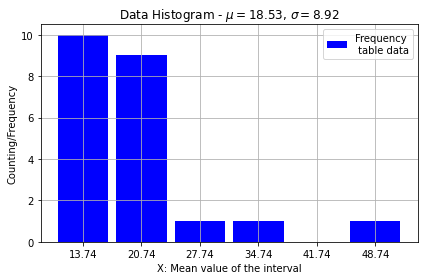

In [17]:
y = dataset1['waiting_time']

#NOTA: o valor y necessariamente deve ser uma série.

estatisticas_gerais_antes_wait, tab_frequencias_antes_wait = histogram(y = y, largura_da_barra = 6, normal_curve_overlay = False, legenda_dos_dados = None, titulo_y = None, titulo_histograma = None)

# Altere manualmente o valor numérico da largura_da_barra do histograma até alcançar um espaçamento mínimo entre barras
#consecutivas. O valor da largura da barra depende de cada conjunto particular de dados utilizado.

"""
Substitua os demais campos None de acordo com as instruções dadas na CÉLULA 8.
- Os títulos e legendas devem ser fornecidos como um texto entre aspas.
- Modifique normal_curve_overlay = True para normal_curve_overlay = False caso não deseje ver a normal sobreposta.

"""

estatisticas_gerais_antes_wait.to_csv(r"estatisticas_gerais_antes_wait.csv", index = False)

tab_frequencias_antes_wait.to_csv(r"tab_frequencias_antes_wait.csv", index = False)


In [18]:
estatisticas_gerais_antes_wait

,Estatísticas gerais dos dados,Valor calculado
0,Total de dados avaliados,22.000000
1,Média (mu),18.527562
2,Desvio-padrão (sigma),8.918919
3,Valor mais elevado,46.976415
4,Valor mais baixo,10.241379
5,Range dos dados\n(valor máximo - valor mínimo),36.735036
6,Bin size\n(largura da barra do histograma),7.000000
7,Quantidade de linhas\nna tabela de frequências,6.000000


In [19]:
tab_frequencias_antes_wait

,Intervalos considerados,X: Mean value of the interval,Counting/Frequency
0,10.24 - 17.24,13.741379,10
1,17.24 - 24.24,20.741379,9
2,24.24 - 31.24,27.741379,1
3,31.24 - 38.24,34.741379,1
4,38.24 - 45.24,41.741379,0
5,45.24 - 52.24,48.741379,1


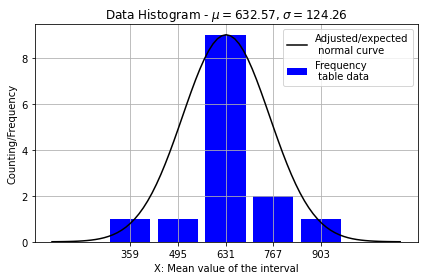

In [23]:
y = dataset2['count']

#NOTA: o valor y necessariamente deve ser uma série.

estatisticas_gerais_depois_count, tab_frequencias_depois_count = histogram(y = y, largura_da_barra = 115, normal_curve_overlay = True, legenda_dos_dados = None, titulo_y = None, titulo_histograma = None)

# Altere manualmente o valor numérico da largura_da_barra do histograma até alcançar um espaçamento mínimo entre barras
#consecutivas. O valor da largura da barra depende de cada conjunto particular de dados utilizado.

"""
Substitua os demais campos None de acordo com as instruções dadas na CÉLULA 8.
- Os títulos e legendas devem ser fornecidos como um texto entre aspas.
- Modifique normal_curve_overlay = True para normal_curve_overlay = False caso não deseje ver a normal sobreposta.

"""

estatisticas_gerais_depois_count.to_csv(r"estatisticas_gerais_depois_count.csv", index = False)

tab_frequencias_depois_count.to_csv(r"tab_frequencias_depois_count.csv", index = False)

In [24]:
estatisticas_gerais_depois_count

,Estatísticas gerais dos dados,Valor calculado
0,Total de dados avaliados,14.000000
1,Média (mu),632.571429
2,Desvio-padrão (sigma),124.255762
3,Valor mais elevado,837.000000
4,Valor mais baixo,291.000000
5,Range dos dados\n(valor máximo - valor mínimo),546.000000
6,Bin size\n(largura da barra do histograma),136.000000
7,Quantidade de linhas\nna tabela de frequências,5.000000


In [25]:
tab_frequencias_depois_count

,Intervalos considerados,X: Mean value of the interval,Counting/Frequency
0,291.00 - 427.00,359.0,1
1,427.00 - 563.00,495.0,1
2,563.00 - 699.00,631.0,9
3,699.00 - 835.00,767.0,2
4,835.00 - 971.00,903.0,1


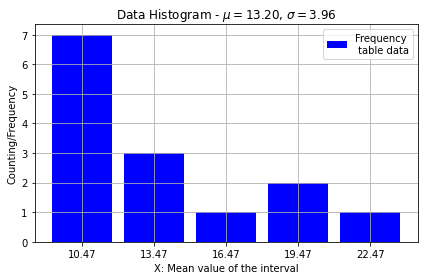

In [32]:
y = dataset2['waiting_time']

#NOTA: o valor y necessariamente deve ser uma série.

estatisticas_gerais_depois_wait, tab_frequencias_depois_wait = histogram(y = y, largura_da_barra = 2.5, normal_curve_overlay = False, legenda_dos_dados = None, titulo_y = None, titulo_histograma = None)

# Altere manualmente o valor numérico da largura_da_barra do histograma até alcançar um espaçamento mínimo entre barras
#consecutivas. O valor da largura da barra depende de cada conjunto particular de dados utilizado.

"""
Substitua os demais campos None de acordo com as instruções dadas na CÉLULA 8.
- Os títulos e legendas devem ser fornecidos como um texto entre aspas.
- Modifique normal_curve_overlay = True para normal_curve_overlay = False caso não deseje ver a normal sobreposta.

"""

estatisticas_gerais_depois_wait.to_csv(r"estatisticas_gerais_depois_wait.csv", index = False)

tab_frequencias_depois_wait.to_csv(r"tab_frequencias_depois_wait.csv", index = False)


In [33]:
estatisticas_gerais_depois_wait

,Estatísticas gerais dos dados,Valor calculado
0,Total de dados avaliados,14.000000
1,Média (mu),13.204216
2,Desvio-padrão (sigma),3.956043
3,Valor mais elevado,21.816225
4,Valor mais baixo,8.967016
5,Range dos dados\n(valor máximo - valor mínimo),12.849209
6,Bin size\n(largura da barra do histograma),3.000000
7,Quantidade de linhas\nna tabela de frequências,5.000000


In [34]:
tab_frequencias_depois_wait

,Intervalos considerados,X: Mean value of the interval,Counting/Frequency
0,8.97 - 11.97,10.467016,7
1,11.97 - 14.97,13.467016,3
2,14.97 - 17.97,16.467016,1
3,17.97 - 20.97,19.467016,2
4,20.97 - 23.97,22.467016,1
